In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("netflix_titles.csv").fillna(0)
#For making font bold, use fontweight='bold'

In [2]:
df['date_added'] = pd.to_datetime(df['date_added'])
df_filtered2021 = df[df['date_added'].dt.strftime('%Y') == '2021']
df_filtered2020 = df[df['date_added'].dt.strftime('%Y') == '2020']
df_filtered2019 = df[df['date_added'].dt.strftime('%Y') == '2019']
frames = [df_filtered2020,df_filtered2021,df_filtered2019]
newdf = pd.concat(frames)

<ipython-input-3-c5c26a5a7aac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  typemonthdf['month'] = typemonthdf['date_added'].dt.month_name()


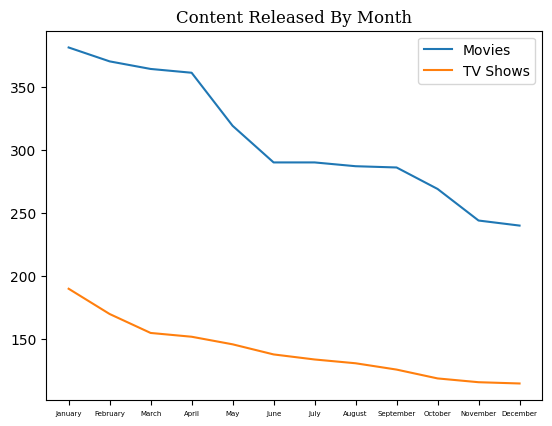

In [3]:
typemonthdf = newdf[['type','date_added']]
typemonthdf['month'] = typemonthdf['date_added'].dt.month_name()
typemonthdf = typemonthdf[['type','month']]
movies = typemonthdf.value_counts().loc['Movie']
tvshows = typemonthdf.value_counts().loc['TV Show']
x = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.plot(x,movies,label='Movies')
plt.plot(x,tvshows,label='TV Shows')
plt.legend()
plt.xticks(fontsize=5)
plt.title('Content Released By Month',fontdict={'family':'serif'})
plt.show()

<ipython-input-4-4f87a880d988>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moviegenredf['genres'] = moviegenredf['listed_in'].apply(lambda x: x.split(","))


Text(0.5, 1.0, 'Breakdown of Movie Genres in India')

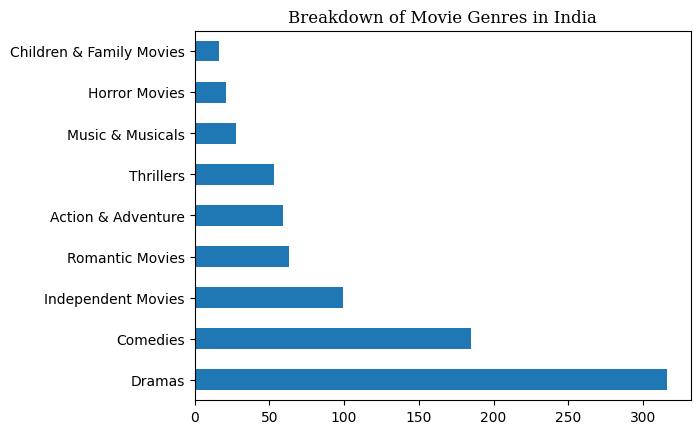

In [4]:
newdf = newdf[newdf['country'] != 0]
hasindia = newdf['country'].apply(lambda x: 'India' in x)
hasindia = hasindia[hasindia == True]
indiadf = newdf.loc[hasindia.index]
genredf = indiadf[['type','listed_in']]
moviegenredf = genredf[genredf['type'] == 'Movie']
moviegenredf['genres'] = moviegenredf['listed_in'].apply(lambda x: x.split(","))
lst = []
for i in moviegenredf['genres']:
  for j in i:
    lst.append(j)
lst = [x.strip(' ') for x in lst]
pd.Series(lst).value_counts()[1:10].plot(kind='barh')
plt.title('Breakdown of Movie Genres in India',fontdict={'family':'serif'})

<ipython-input-5-0ec4f4a78c44>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totaldigital['country'] = totaldigital['country'].apply(lambda x: x.split(","))


Text(0.5, 1.0, 'Digital Content Added by Country')

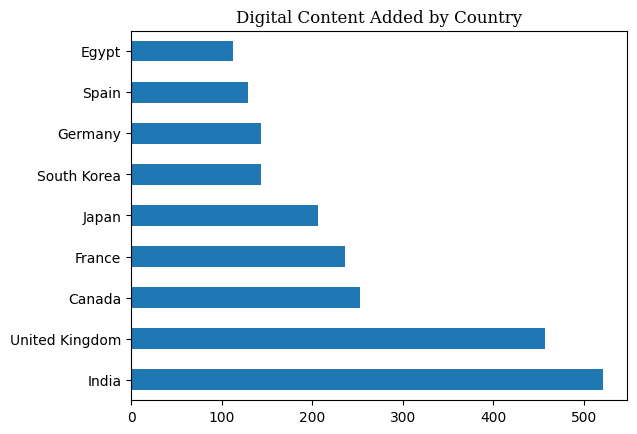

In [5]:
totaldigital = newdf[['type','country']]
totaldigital['country'] = totaldigital['country'].apply(lambda x: x.split(","))
lst0 = []
for i in totaldigital['country']:
  for j in i:
    lst0.append(j)
lst0 = [x.strip(' ') for x in lst0]
pd.Series(lst0).value_counts()[1:10].plot(kind='barh')
plt.title('Digital Content Added by Country',fontdict={'family':'serif'})

<ipython-input-6-12503c81e7b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tvgenredf['genres'] = tvgenredf['listed_in'].apply(lambda x: x.split(","))


Text(0.5, 1.0, 'Breakdown of TV Show Genres in India')

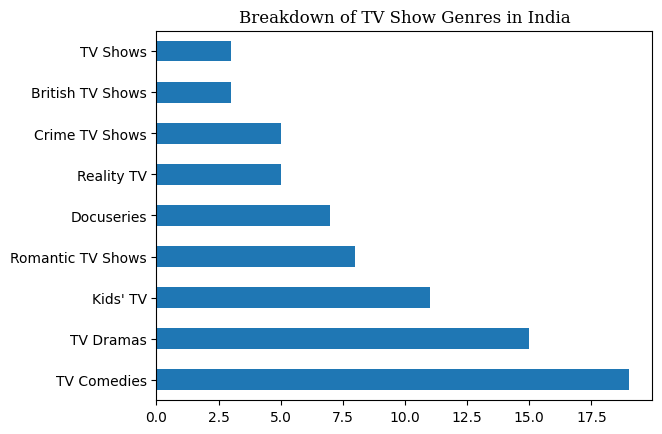

In [6]:
tvgenredf = genredf[genredf['type'] == 'TV Show']
tvgenredf['genres'] = tvgenredf['listed_in'].apply(lambda x: x.split(","))
lst2 = []
for i in tvgenredf['genres']:
  for j in i:
    lst2.append(j)
lst2 = [x.strip(' ') for x in lst2]
pd.Series(lst2).value_counts()[1:10].plot(kind='barh')
plt.title('Breakdown of TV Show Genres in India',fontdict={'family':'serif'})

Text(0, 0.5, 'Country')

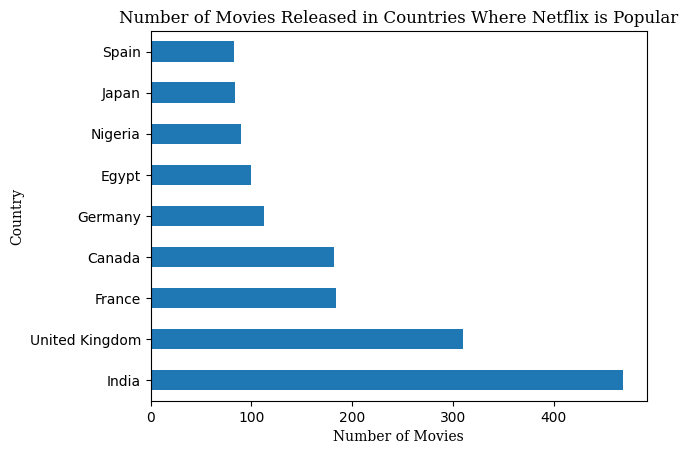

In [7]:
movies2 = newdf[newdf['type'] == 'Movie']
lst3 = []
movies2 = movies2[movies2['country'] != 0]
movies2['country'] = movies2['country'].apply(lambda x: x.split(", "))
for i in movies2['country']:
  for j in i:
    lst3.append(j)
lst3 = [x.strip(' ') for x in lst3]
pd.Series(lst3).value_counts()[1:10].plot(kind='barh')
plt.title("Number of Movies Released in Countries Where Netflix is Popular",fontdict={'family':'serif'})
plt.xlabel("Number of Movies",fontdict={'family':'serif'})
plt.ylabel("Country",fontdict={'family':'serif'})

Text(0, 0.5, 'Country')

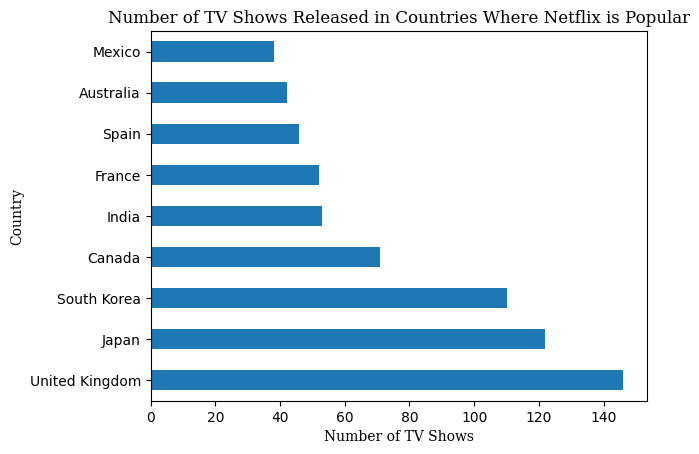

In [8]:
tvshows2 = newdf[newdf['type'] == 'TV Show']
lst4 = []
tvshows2 = tvshows2[tvshows2['country'] != 0]
tvshows2['country'] = tvshows2['country'].apply(lambda x: x.split(", "))
for i in tvshows2['country']:
  for j in i:
    lst4.append(j)
lst4 = [x.strip(' ') for x in lst4]
pd.Series(lst4).value_counts()[1:10].plot(kind='barh')
plt.title("Number of TV Shows Released in Countries Where Netflix is Popular",fontdict={'family':'serif'})
plt.xlabel("Number of TV Shows",fontdict={'family':'serif'})
plt.ylabel("Country",fontdict={'family':'serif'})

Text(0.5, 1.0, 'Most Popular Indian Actors')

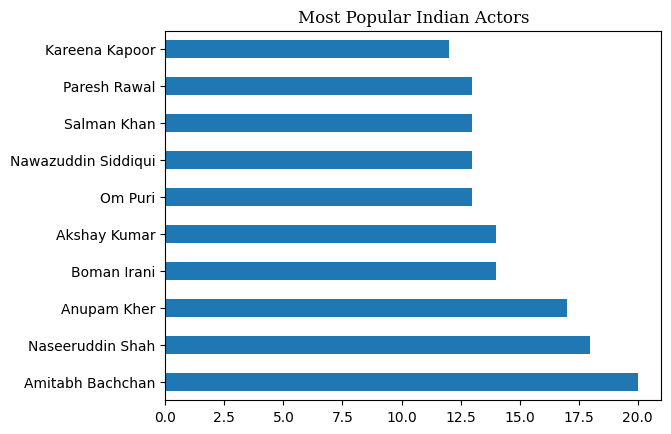

In [9]:
indiacastdf = indiadf[indiadf['cast'] != 0]
indiacastdf = indiacastdf['cast'].apply(lambda x: x.split(", "))
lst5 = []
for i in indiacastdf:
  for j in i:
    lst5.append(j)
lst5 = [x.strip(' ') for x in lst5]
pd.Series(lst5).value_counts()[0:10].plot(kind='barh')
plt.title("Most Popular Indian Actors",fontdict={'family':'serif'})

Text(0.5, 1.0, 'Most Popular Indian Directors')

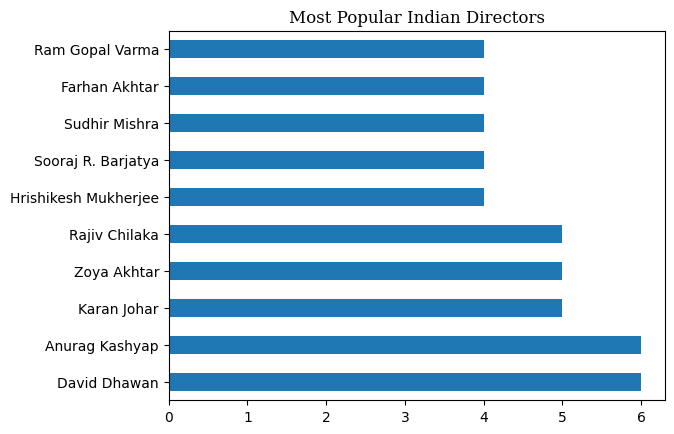

In [10]:
indiadirectordf = indiadf[indiadf['director'] != 0]
indiadirectordf = indiadirectordf['director'].apply(lambda x: x.split(", "))
lst6 = []
for i in indiadirectordf:
  for j in i:
    lst6.append(j)
lst6 = [x.strip(' ') for x in lst6]
pd.Series(lst6).value_counts()[0:10].plot(kind='barh')
plt.title("Most Popular Indian Directors",fontdict={'family':'serif'})

<ipython-input-11-e1f2d9b38b24>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  byyeardf['year'] = byyeardf['date_added'].dt.year


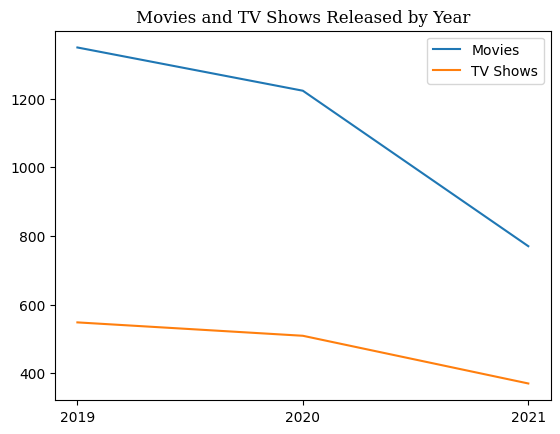

In [11]:
byyeardf = newdf[['type','date_added']]
byyeardf['year'] = byyeardf['date_added'].dt.year
byyeardf = byyeardf[['type','year']]
moviesbyyear = byyeardf.value_counts()['Movie']
tvbyyear = byyeardf.value_counts()['TV Show']
years = ['2019','2020','2021']
plt.plot(years,moviesbyyear,label='Movies')
plt.plot(years,tvbyyear,label='TV Shows')
plt.title('Movies and TV Shows Released by Year',fontdict={'family':'serif'})
plt.legend()

<ipython-input-12-f8dbedf585eb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tvgenredf2['genres'] = tvgenredf2['listed_in'].apply(lambda x: x.split(","))


Text(0.5, 1.0, 'Breakdown of TV Show Genres For All Countries')

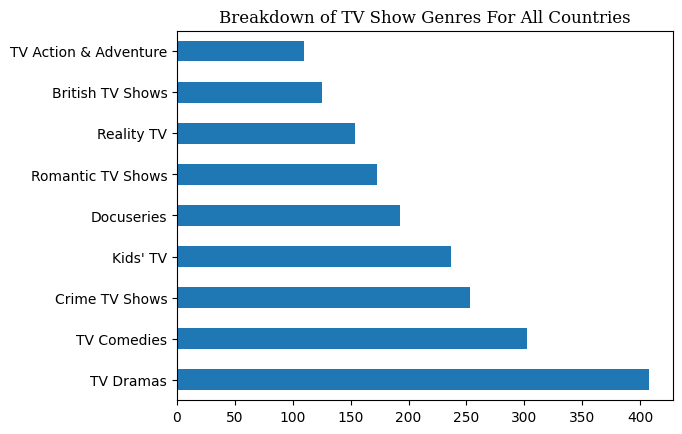

In [12]:
genredf2 = newdf[['type','listed_in']]
tvgenredf2 = genredf2[genredf2['type'] == 'TV Show']
tvgenredf2['genres'] = tvgenredf2['listed_in'].apply(lambda x: x.split(","))
lst7 = []
for i in tvgenredf2['genres']:
  for j in i:
    lst7.append(j)
lst7 = [x.strip(' ') for x in lst7]
pd.Series(lst7).value_counts()[1:10].plot(kind='barh')
plt.title('Breakdown of TV Show Genres For All Countries',fontdict={'family':'serif'})

<ipython-input-13-bac38f42e118>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moviegenredf2['genres'] = moviegenredf2['listed_in'].apply(lambda x: x.split(","))


Text(0.5, 1.0, 'Breakdown of Movie Genres For All Countries')

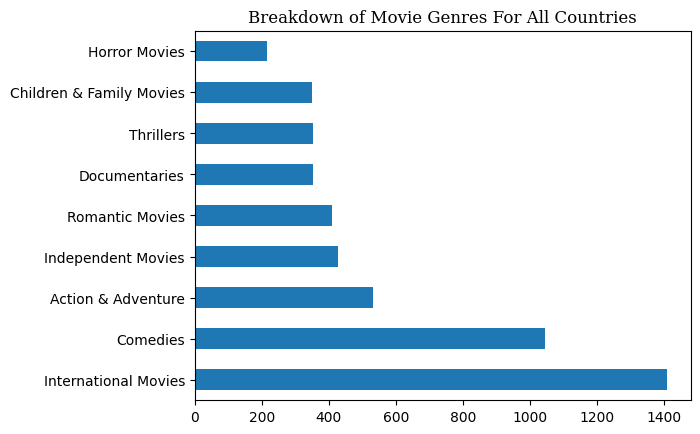

In [13]:
moviegenredf2 = genredf2[genredf2['type'] == 'Movie']
moviegenredf2['genres'] = moviegenredf2['listed_in'].apply(lambda x: x.split(","))
lst8 = []
for i in moviegenredf2['genres']:
  for j in i:
    lst8.append(j)
lst8 = [x.strip(' ') for x in lst8]
pd.Series(lst8).value_counts()[1:10].plot(kind='barh')
plt.title('Breakdown of Movie Genres For All Countries',fontdict={'family':'serif'})